In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv('/content/Live (1).csv')

In [48]:

df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [49]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [50]:
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [51]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [52]:
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [54]:
unique_status_ids_count=df['status_id'].nunique


In [55]:
df['status_published'].nunique()

6913

In [56]:

df['status_type'].nunique()

4

In [57]:
df.drop(columns=['status_id', 'status_published'], inplace=True)

In [58]:
x=df.drop('status_type',axis=1)

In [59]:
y=df['status_type']

In [60]:
print("feature vector(x):")
print(x.head(2))

feature vector(x):
   num_reactions  num_comments  num_shares  num_likes  ...  num_wows  num_hahas  num_sads  num_angrys
0            529           512         262        432  ...         3          1         1           0
1            150             0           0        150  ...         0          0         0           0

[2 rows x 9 columns]


In [26]:
print("\nTarget variable(y):")
print(y.head(2))


Target variable(y):
0    video
1    photo
Name: status_type, dtype: object


In [28]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [29]:
summary =x.describe()
print(summary)

       num_reactions  num_comments   num_shares  ...    num_hahas     num_sads   num_angrys
count    7050.000000   7050.000000  7050.000000  ...  7050.000000  7050.000000  7050.000000
mean      230.117163    224.356028    40.022553  ...     0.696454     0.243688     0.113191
std       462.625309    889.636820   131.599965  ...     3.957183     1.597156     0.726812
min         0.000000      0.000000     0.000000  ...     0.000000     0.000000     0.000000
25%        17.000000      0.000000     0.000000  ...     0.000000     0.000000     0.000000
50%        59.500000      4.000000     0.000000  ...     0.000000     0.000000     0.000000
75%       219.000000     23.000000     4.000000  ...     0.000000     0.000000     0.000000
max      4710.000000  20990.000000  3424.000000  ...   157.000000    51.000000    31.000000

[8 rows x 9 columns]


In [32]:
#feature scaling
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [33]:
#k-means model with two cluster
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=42)

In [36]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

In [35]:
kmeans.inertia_

99.50082638379908

In [38]:
silhoutte_avg=silhouette_score(x_scaled,kmeans.labels_)
print(f"silhouette score for 2 cluster: {silhoutte_avg}")

silhouette score for 2 cluster: 0.8125263296259583


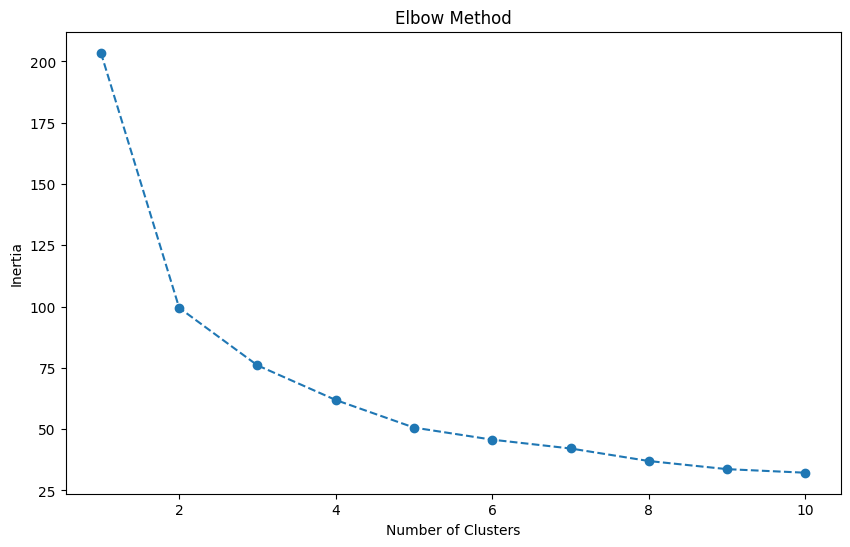

In [45]:
intertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_scaled)
  intertia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1,11),intertia,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [42]:
kmeans2=KMeans(n_clusters=2,random_state=42)
kmeans2.fit(x_scaled)
labels=kmeans2.labels_
#checked how many of the samples were correctly labeled
correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels,y.size))
print('Accuracy score: {:.2f}'.format(correct_labels / float(y.size)))

Result: 275 out of 7050 samples were correctly labeled.
Accuracy score: 0.04
